In [2]:
from glob import glob
import os

In [3]:
working_dir = '/Users/aeiwz/Github/metbit/metbit/test'


#Create path to store the OPLS-DA plots and data
os.makedirs(working_dir, exist_ok=True)
os.makedirs(working_dir+'/element', exist_ok=True)
os.makedirs(working_dir+'/element/plots/hist_plot', exist_ok=True)
os.makedirs(working_dir+'/element/plots/Lingress', exist_ok=True)
os.makedirs(working_dir+'/element/plots/loading_plot', exist_ok=True)
os.makedirs(working_dir+'/element/plots/s_plot', exist_ok=True)
os.makedirs(working_dir+'/element/plots/score_plot', exist_ok=True)
os.makedirs(working_dir+'/element/plots/VIP_score_plot', exist_ok=True)
os.makedirs(working_dir+'/element/data/Permutation_scores', exist_ok=True)
os.makedirs(working_dir+'/element/data/OPLS_scores', exist_ok=True)
os.makedirs(working_dir+'/element/data/Loading_scores', exist_ok=True)
os.makedirs(working_dir+'/element/data/VIP_scores', exist_ok=True)
os.mkdir(working_dir+'/main')

In [20]:
dir = glob(working_dir + '/element/*/*/')

#Create dictionary to store the path
path = {}
for i in dir:
    path[i.split('/')[-2]] = i



{'Loading_scores': '/Users/aeiwz/Github/metbit/metbit/test/element/data/Loading_scores/',
 'VIP_scores': '/Users/aeiwz/Github/metbit/metbit/test/element/data/VIP_scores/',
 'OPLS_scores': '/Users/aeiwz/Github/metbit/metbit/test/element/data/OPLS_scores/',
 'Permutation_scores': '/Users/aeiwz/Github/metbit/metbit/test/element/data/Permutation_scores/',
 'VIP_score_plot': '/Users/aeiwz/Github/metbit/metbit/test/element/plots/VIP_score_plot/',
 'Lingress': '/Users/aeiwz/Github/metbit/metbit/test/element/plots/Lingress/',
 'score_plot': '/Users/aeiwz/Github/metbit/metbit/test/element/plots/score_plot/',
 's_plot': '/Users/aeiwz/Github/metbit/metbit/test/element/plots/s_plot/',
 'hist_plot': '/Users/aeiwz/Github/metbit/metbit/test/element/plots/hist_plot/',
 'loading_plot': '/Users/aeiwz/Github/metbit/metbit/test/element/plots/loading_plot/'}

In [281]:
def project_name_generator():
    #random project name
    #get random time
    import random
    import time
    # Get local time
    current_time = time.localtime()
    # Set format for time
    time_format = time.strftime('%Y-%m-%d %H:%M:%S', current_time)
    project_names = [
                    "QuantumQuest",
                    "NebulaNet",
                    "StellarSync",
                    "AeroPulse",
                    "CyberCircuit",
                    "TerraTrack",
                    "HoloHive",
                    "PyroPixel",
                    "LunarLoom",
                    "ZenithZero",
                    "BlazeBeacon",
                    "AquaArise",
                    "EchoEclipse",
                    "FusionForge",
                    "OrbitOpus",
                    "PrismPortal",
                    "NimbusNexus",
                    "AstroArc",
                    "VoltVoyage",
                    "OmniOrbit",
                    "PulsePioneer",
                    "VortexVoyage",
                    "GalacticGrid",
                    "SolarSpectrum",
                    "Satternlite",
                    "StarSpectrum",
                    "SpaceSpectrum",
                    "GalacticSpectrum"
                    ]

    project_name = time_format + '_' + random.choice(project_names)
    return project_name


In [284]:

class lazypair:


    def __init__(self, dataset, column_name):
        
        meta = dataset
        self.meta = meta
        self.column_name = column_name
        

        """
        This function takes in a dataframe and a column name and returns the index of the dataframe and the names of the pairs
        of the unique values in the column.
        Parameters
        ----------
        meta: pandas dataframe
            The dataframe to be used.
        column_name: str
        Unipair(meta, column_name).indexing()
        
        """
        import pandas as pd
        import numpy as np
        
        #check unique values in the column
        if meta[column_name].nunique() < 3:
            raise ValueError("Group should contain at least 3 groups")
        else:
            pass
        #check meta is a dataframe
        if not isinstance(meta, pd.DataFrame):
            raise ValueError("meta should be a pandas dataframe")
        #check column_name is a string
        if not isinstance(column_name, str):
            raise ValueError("column_name should be a string")
        

        df = meta
        y = df[column_name].unique()
        pairs = []
        for i in range(len(y)):
            for j in range(i+1, len(y)):
                pairs.append([y[i], y[j]])
        
        index_ = []
        for i in range(len(pairs)):
            inside_index = []
            for j in range(2):
                inside_index.append(list((df.loc[df[column_name] == pairs[i][j]]).index))
            index_list = [inside_index[0] + inside_index[1]]
            index_.append(index_list[0])
        pairs
        index_
        names = []
        for i in range(len(pairs)):
            
            names.append(str(pairs[i][0]) + "_vs_" + str(pairs[i][1]))
            #check names if contain / replace with _ 
            names[i] = names[i].replace('/', '_')
            
        del df
        del y
        
        self.index_ = index_
        self.names = names
        
        
        

    def get_index(self):
        index_ = self.index_
        return index_
    
    def get_name(self):
        names = self.names
        return names
    
    def get_meta(self):
        meta = self.meta
        column_name = self.column_name
        return meta[column_name]
    
    def get_column_name(self):
        column_name = self.column_name
        return column_name
    
    def get_dataset(self):
        df = self.meta
        index_ = self.index_
        list_of_df = []
        for i in range(len(index_)):
            list_of_df.append(df.loc[index_[i]])
        
        #Create object attribute
        self.list_of_df = list_of_df
        return list_of_df

In [158]:
project_name_generator()

'CyberCircuit 2024-06-25 11:12:48'

In [287]:
class lazy_opls_da:

    
    import os
    from glob import glob
    import pandas as pd
    import numpy as np
    import random
    from metbit import opls_da

    from metbit import project_name_generator
    

    def __init__(self, data: pd.DataFrame, groups: list, working_dir: str, n_components: int = 2, scaling: str = 'pareto', 
                    estimator: str = 'opls', kfold: int = 3, random_state: int = 94, auto_ncomp: bool = True,  
                    permutation: bool = True, 
                    VIP: bool = True, 
                    linear_regression: bool = True) -> None:

        self.groups = groups
        self.n_components = n_components
        self.working_dir = working_dir

        self.random_state = random_state        
        self.estimator = estimator
        self.scale = scaling
        self.kfold = kfold
        self.auto_ncomp = auto_ncomp
        

        data['Class'] = groups
        self.data = data

        self.permutation = permutation
        if permutation == True:
            self.n_permutataion = int(input('Enter the number of permutation: '))
            self.n_jobs = int(input('Enter the number of jobs: '))
        else:
            pass
        
        self.VIP = VIP
        if VIP == True:
            self.VIP_threshold = float(input('Enter the VIP threshold: '))

        self.linear_regression = linear_regression
        if linear_regression == True:
            self.FC_threshold = float(input('Enter the fold change threshold: '))
            self.p_val_threshold = float(input('Enter the p-value threshold: '))

        """
        This function takes in a dataframe and a list of y values and returns the project_name model.
        Parameters
        ----------
        data: pandas dataframe
            The dataframe to be used.
        y: list
            The list of y values.
        n_components: int
            The number of components to use.
        lazy_opls_da(data, y, n_components).fit()
        """
        
        project_name = project_name_generator()
        

        #Remove last / from working_dir
        if working_dir[-1] == '/':
            working_dir = working_dir[:-1]
        else:
            working_dir = working_dir

        #Replace \ with / for windows
        working_dir = working_dir.replace('\\', '/')


        if os.path.exists(working_dir + '/' + project_name + '/element'):
            print('Directory already exist')
        else:
            folder_name_plot = ['loading_plot', 's_plot', 'score_plot']
            folder_name_data = []
            if permutation == True:
                folder_name_plot.append('hist_plot')
            else:
                pass
            if VIP == True:
                folder_name_plot.append('VIP_score_plot')
                folder_name_data.append('VIP_scores')
            else:
                pass
            if linear_regression == True:
                folder_name_plot.append('Volcano_plot')
                folder_name_data.append('Lingress_data')
            else:
                pass



            os.makedirs(working_dir+'/' + project_name + '/element', exist_ok=True)
            for i in folder_name_plot:
                os.makedirs(working_dir+'/' + project_name + '/element/plots/' + i, exist_ok=True)
            for i in folder_name_data:
                os.makedirs(working_dir+'/' + project_name + '/element/data/' + i, exist_ok=True)

            os.makedirs(working_dir+'/' + project_name + '/main')

        #Create dictionary to store the path
        dir = glob(working_dir + '/' + project_name + '/element/*/*/')

        #Create dictionary to store the path
        path = {}
        for i in dir:
            path[i.split('/')[-2]] = i

        self.color_map = color_map
        self.path = path

        #Print summary model as table text format
        Summary = f"""
        Project Name: {project_name}
        Number of groups: {len(data['Class'].unique())}
        Number of samples: {len(data)}
        Number of features: {len(data.columns) - 1}
        Number of components: {n_components}
        Estimator: {estimator}
        Scaling: {scaling}
        Kfold: {kfold}
        Random state: {random_state}
        Auto ncomp: {auto_ncomp}
        Working directory: {working_dir}
        Permutation: {permutation}
        VIP: {VIP}
        Linear regression: {linear_regression}
        """

        return print(Summary)



    def fit(self, marker_color: dict = None) -> None:

        from metbit import opls_da
        from lingress import lin_regression
        from metbit import lazypair

     
        data = self.data
        n_components = self.n_components
        path = self.path
        color_map = self.color_map
        scale = self.scale

        marker_color = marker_color


        #Create object attribute
        lazy = lazypair(data, 'Class')
        data_list = lazy.get_dataset()
        name_save = lazy.get_name()

        for i in range(len(data_list)):
            
            df = data_list[i]
            name = name_save[i]

            X = df.drop('Class', axis=1)
            y = df['Class']
            feature_names = X.columns
            # Check if feature names can be converted to float
            try:
                feature_names = feature_names(float).tolist()
            except:
                feature_names = feature_names.tolist()

            #OPLS-DA
            oplsda_mod = opls_da(X=X, y=y, features_name = feature_names, n_components=n_components, scale=scale, estimator=self.estimator, kfold=self.kfold, random_state=self.random_state, auto_ncomp = self.auto_ncomp)
            oplsda_mod.fit()

            #Score plot
            oplsda_mod.plot_oplsda_scores(color_dict=marker_color).write_html(path['score_plot'] + name + '_score_plot.html')
            oplsda_mod.plot_oplsda_scores(color_dict=marker_color).write_image(path['score_plot'] + name + '_score_plot.png')

            #Loading plot
            oplsda_mod.plot_loading().write_html(path['loading_plot'] + name + '_loading_plot.html')
            oplsda_mod.plot_loading().write_image(path['loading_plot'] + name + '_loading_plot.png')

            #S plot
            oplsda_mod.plot_s_scores().write_html(path['s_plot'] + name + '_s_plot.html')
            oplsda_mod.plot_s_scores().write_image(path['s_plot'] + name + '_s_plot.png')

            #VIP score plot
            if self.VIP == True:
                oplsda_mod.vip_scores()
                oplsda_mod.get_vip_scores().to_csv(path['VIP_scores'] + name + '_VIP_scores.csv')
                oplsda_mod.vip_plot(threshold=self.VIP_threshold).write_html(path['VIP_score_plot'] + name + '_VIP_score_plot.html')
                oplsda_mod.vip_plot(threshold=self.VIP_threshold).write_image(path['VIP_score_plot'] + name + '_VIP_score_plot.png')
            else:
                pass

            #Permutation test
            if self.permutation == True:
                oplsda_mod.permutation_test(n_permutations=self.n_permutataion, n_jobs=self.n_jobs)
                oplsda_mod.plot_hist().write_html(path['hist_plot'] + name + '_hist_plot.html')
                oplsda_mod.plot_hist().write_image(path['hist_plot'] + name + '_hist_plot.png')
            else:
                pass

            #Linear regression
            if self.linear_regression == True:
                lin_ = lin_regression(x=X, target=y, label=y, features_name=feature_names)
                lin_.create_dataset()
                lin_.fit_model(adj_method='fdr_bh')
                lin_.volcano_plot(fc_cut_off=self.FC_threshold, p_val_cut_off=self.p_val_threshold).write_html(path['Volcano_plot'] + name + '_Volcano_plot.html')
                lin_.volcano_plot(fc_cut_off=self.FC_threshold, p_val_cut_off=self.p_val_threshold).write_image(path['Volcano_plot'] + name + '_Volcano_plot.png')
                lin_.report().to_csv(path['Lingress_data'] + name + '_Lingress_data.csv', index=False)
            else:
                pass
        
        return print('Model has been fitted successfully')



In [243]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/iris.csv')
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [244]:
data = df.drop('Name', axis=1)
groups = df['Name']

In [288]:
lazy_opls_da(data=data, groups=groups, working_dir='/Users/aeiwz/Github/metbit/metbit/test').fit()


        Project Name: 2024-06-25 16:46:49_SpaceSpectrum
        Number of groups: 3
        Number of samples: 150
        Number of features: 4
        Number of components: 2
        Estimator: opls
        Scaling: pareto
        Kfold: 3
        Random state: 94
        Auto ncomp: True
        Working directory: /Users/aeiwz/Github/metbit/metbit/test
        Permutation: True
        VIP: True
        Linear regression: True
        
OPLS-DA model is fitted in 0.020121097564697266 seconds


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  24 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


Permutation test is performed in 0.15579795837402344 seconds


Features processed:   4%|▍         | 4/100 [00:00<00:00, 334.23it/s]

adjustment p-value with Benjamini/Hochberg (non-negative) Done
OPLS-DA model is fitted in 0.002131938934326172 seconds



[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  24 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


Permutation test is performed in 0.144212007522583 seconds


Features processed:   4%|▍         | 4/100 [00:00<00:00, 588.90it/s]

adjustment p-value with Benjamini/Hochberg (non-negative) Done
OPLS-DA model is fitted in 0.002429962158203125 seconds



[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  24 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


Permutation test is performed in 0.14325213432312012 seconds


Features processed:   4%|▍         | 4/100 [00:00<00:00, 522.12it/s]

adjustment p-value with Benjamini/Hochberg (non-negative) Done
Model has been fitted successfully


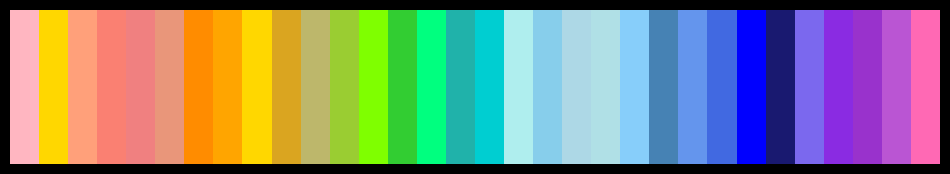

In [200]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# List of 32 different color codes in HEX format
colors = [
     "#FFB6C1", "#FFD700", "#FFA07A", "#FA8072", "#F08080", "#E9967A", "#FF8C00",
    "#FFA500", "#FFD700", "#DAA520", "#BDB76B", "#9ACD32", "#7FFF00", "#32CD32",
    "#00FF7F", "#20B2AA", "#00CED1", "#AFEEEE", "#87CEEB", "#ADD8E6", "#B0E0E6",
    "#87CEFA", "#4682B4", "#6495ED", "#4169E1", "#0000FF", "#191970", "#7B68EE",
    "#8A2BE2", "#9932CC", "#BA55D3", "#FF69B4"
]

# Convert HEX colors to RGB
rgb_colors = [mcolors.to_rgb(c) for c in colors]

# Create an image with the colors
image = np.array([rgb_colors])

# Plotting the colors
fig, ax = plt.subplots(figsize=(12, 2))
ax.imshow(image.reshape(1, len(colors), 3), aspect='auto')
ax.axis('off')  # Turn off axis
plt.show()


In [227]:
colors = [
     "#FFB6C1", "#FFD700", "#FFA07A", "#FA8072", "#F08080", "#E9967A", "#FF8C00",
    "#FFA500", "#FFD700", "#DAA520", "#BDB76B", "#9ACD32", "#7FFF00", "#32CD32",
    "#00FF7F", "#20B2AA", "#00CED1", "#AFEEEE", "#87CEEB", "#ADD8E6", "#B0E0E6",
    "#87CEFA", "#4682B4", "#6495ED", "#4169E1", "#0000FF", "#191970", "#7B68EE",
    "#8A2BE2", "#9932CC", "#BA55D3", "#FF69B4"
]

import random

color_map = {}
for i in range(23):
    color_map[i] = str(random.sample(colors, 1)).removeprefix("['").removesuffix("']")

In [228]:
color_map


{0: '#DAA520',
 1: '#87CEEB',
 2: '#BA55D3',
 3: '#FF69B4',
 4: '#9ACD32',
 5: '#FFD700',
 6: '#20B2AA',
 7: '#87CEFA',
 8: '#ADD8E6',
 9: '#9ACD32',
 10: '#6495ED',
 11: '#7FFF00',
 12: '#00CED1',
 13: '#AFEEEE',
 14: '#B0E0E6',
 15: '#FFD700',
 16: '#AFEEEE',
 17: '#AFEEEE',
 18: '#8A2BE2',
 19: '#BDB76B',
 20: '#6495ED',
 21: '#9ACD32',
 22: '#87CEFA'}

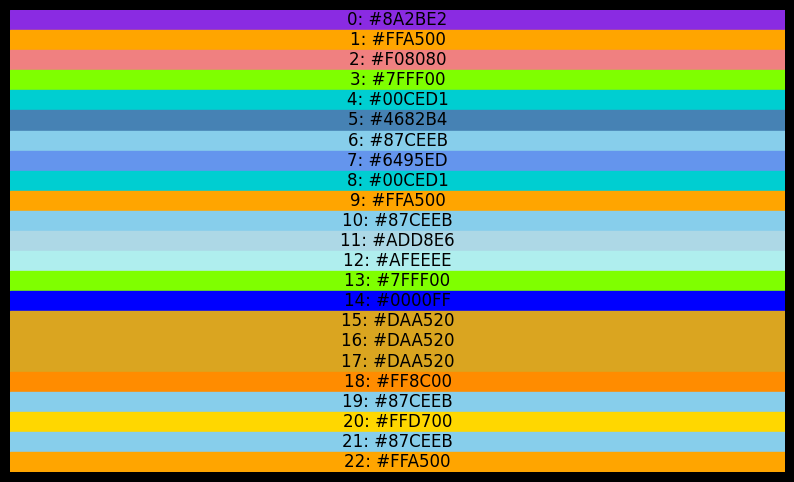

In [231]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import random

# Define the colors and their corresponding names
colors = [
    "#FFB6C1", "#FFD700", "#FFA07A", "#FA8072", "#F08080", "#E9967A", "#FF8C00",
    "#FFA500", "#FFD700", "#DAA520", "#BDB76B", "#9ACD32", "#7FFF00", "#32CD32",
    "#00FF7F", "#20B2AA", "#00CED1", "#AFEEEE", "#87CEEB", "#ADD8E6", "#B0E0E6",
    "#87CEFA", "#4682B4", "#6495ED", "#4169E1", "#0000FF", "#191970", "#7B68EE",
    "#8A2BE2", "#9932CC", "#BA55D3", "#FF69B4"
]

# Generate color map
color_map = {}
for i in range(23):
    color_map[i] = str(random.sample(colors, 1)).removeprefix("['").removesuffix("']")

# Plot the color map using rectangles and texts directly
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the color blocks and labels
for i, (index, color) in enumerate(color_map.items()):
    ax.add_patch(mpatches.Rectangle((0, i), 1, 1, color=color))
    plt.text(0.5, i + 0.5, f"{index}: {color}", ha='center', va='center', fontsize=12, color="black" if color not in ["#000000", "#191970"] else "white")

# Set limits and remove axes
ax.set_xlim(0, 1)
ax.set_ylim(0, len(color_map))
ax.axis('off')
plt.gca().invert_yaxis()

plt.show()



In [210]:
len(unique_color)

23

In [171]:
import pandas as pd
import numpy as np

In [182]:
data = pd.DataFrame(np.random.rand(100, 10))
y = np.random.randint(0, 2, 100)
n_components = 2

lazy_opls_da(data, y, n_components, working_dir, permutation=False, VIP=False, linear_regression=False)

In [178]:

dir = glob('/Users/aeiwz/Github/metbit/metbit/test/QuantumQuest 2024-06-25 11:29:53' + '/element/*/*/')

#Create dictionary to store the path
path = {}
for i in dir:
    path[i.split('/')[-2]] = i

In [179]:
path

{'Loading_scores': '/Users/aeiwz/Github/metbit/metbit/test/QuantumQuest 2024-06-25 11:29:53/element/data/Loading_scores/',
 'VIP_scores': '/Users/aeiwz/Github/metbit/metbit/test/QuantumQuest 2024-06-25 11:29:53/element/data/VIP_scores/',
 'OPLS_scores': '/Users/aeiwz/Github/metbit/metbit/test/QuantumQuest 2024-06-25 11:29:53/element/data/OPLS_scores/',
 'Permutation_scores': '/Users/aeiwz/Github/metbit/metbit/test/QuantumQuest 2024-06-25 11:29:53/element/data/Permutation_scores/',
 'Lingress_data': '/Users/aeiwz/Github/metbit/metbit/test/QuantumQuest 2024-06-25 11:29:53/element/data/Lingress_data/',
 'VIP_score_plot': '/Users/aeiwz/Github/metbit/metbit/test/QuantumQuest 2024-06-25 11:29:53/element/plots/VIP_score_plot/',
 'Lingress': '/Users/aeiwz/Github/metbit/metbit/test/QuantumQuest 2024-06-25 11:29:53/element/plots/Lingress/',
 'score_plot': '/Users/aeiwz/Github/metbit/metbit/test/QuantumQuest 2024-06-25 11:29:53/element/plots/score_plot/',
 's_plot': '/Users/aeiwz/Github/metbit/me